# Titanlib min working example

### Table of Contents  

- [How to make a titanlib point](#How-to-make-a-titanlib-point)
- [Metadata check](#Metadata-check)
- [How to make a dataset](#How-to-make-a-dataset)
- [Range check](#Range-check)
- [Isolation check](#Isolation-check)

- [Climatology range check](#Climatology-range-check)
- [Buddy check](#Buddy-check)
- [Buddy event check](#Buddy-event-check)
- [First guess test](#First-guess-test)
- [Spatial consistency test](#Spatial-consistency-test)
- [Spatial consistency test resistant](#Spatial-consistency-test-resistant)



## How to make a titanlib point

In [1]:
import titanlib
import xarray as xr
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
# Set a larger number of points
n = 100

# Generate lat/lon in a rough grid pattern over ~1°x1°
lat = 60.0 + 0.01 * np.random.rand(n)
lon = 10.0 + 0.01 * np.random.rand(n)
elev = 100 + 10 * np.random.rand(n)

# Generate synthetic temperature (in Kelvin)
temperature = 273.15 + 5 + np.random.randn(n)  # ~5°C ± 1°C

# Introduce outliers
outlier_indices = np.random.choice(n, size=15, replace=False)
temperature[outlier_indices] += np.random.choice([10, 15], size=15)  # Big jump

## Metadata check
Checks lat (`True`), lon (`True`), elev (`True`), and land area fraction (`False`)


In [2]:
points = titanlib.Points(lat, lon, elev)
flags = titanlib.metadata_check(
    points, True, True, True, False)
print("Flags returned by Metadata Check:")

print(flags)

Flags returned by Metadata Check:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## How to make a dataset

This is a way that titanlib manages multiple checks preverving the flags.
<span style="color: red;">I didn't end up using this as it doesn't seem to work properly.</span>

In [3]:
dataset = titanlib.Dataset(points, temperature)

## Range check

ERROR! Session/line number was not unique in database. History logging moved to new session 2
Flags returned by Range Check:
[0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


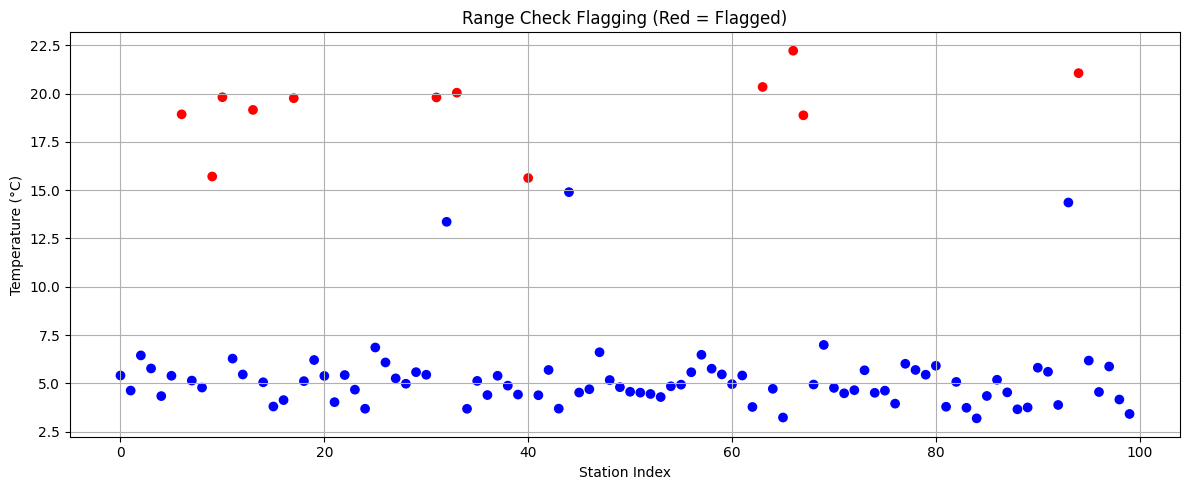

In [4]:
tmin = np.full(n, 273.15-15)
tmax = np.full(n, 273.15+15)

print("Flags returned by Range Check:")
flags = titanlib.range_check(temperature, tmin, tmax)
print(flags)

# Plot flagged results
plt.figure(figsize=(12, 5))
plt.scatter(range(n), temperature - 273.15, c=['red' if f else 'blue' for f in flags])
plt.title("Range Check Flagging (Red = Flagged)")
plt.xlabel("Station Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

 

## Isolation check

Flags returned by Isolation Check:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


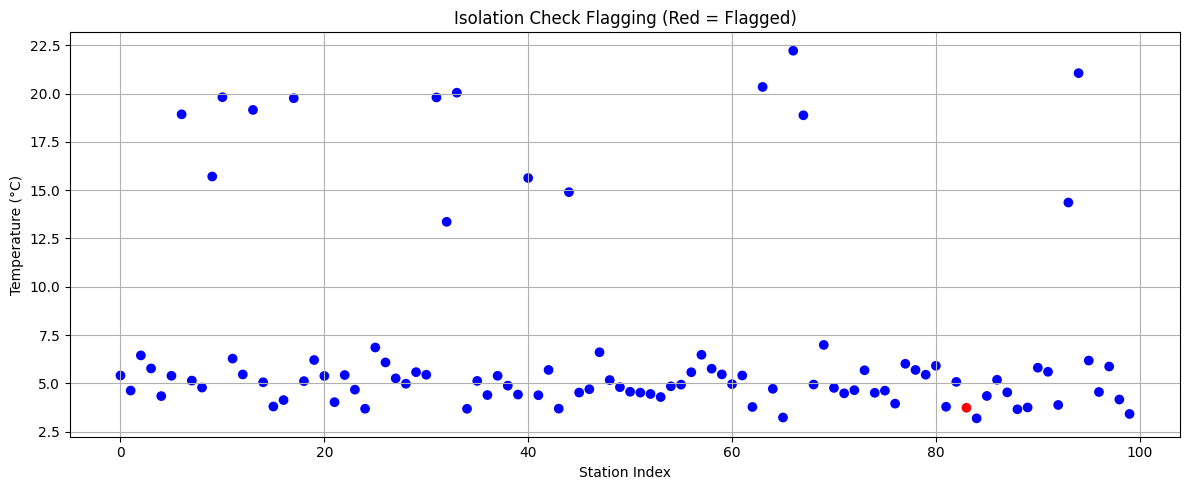

In [5]:
radius = 100 # m
nb_neigh = 1

flags = titanlib.isolation_check(points, nb_neigh, radius)
print("Flags returned by Isolation Check:")
print(flags)

# Plot flagged results
plt.figure(figsize=(12, 5))
plt.scatter(range(n), temperature - 273.15, c=['red' if f else 'blue' for f in flags])
plt.title("Isolation Check Flagging (Red = Flagged)")
plt.xlabel("Station Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Climatology range check  

Flags returned by Climatology Check:
[0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


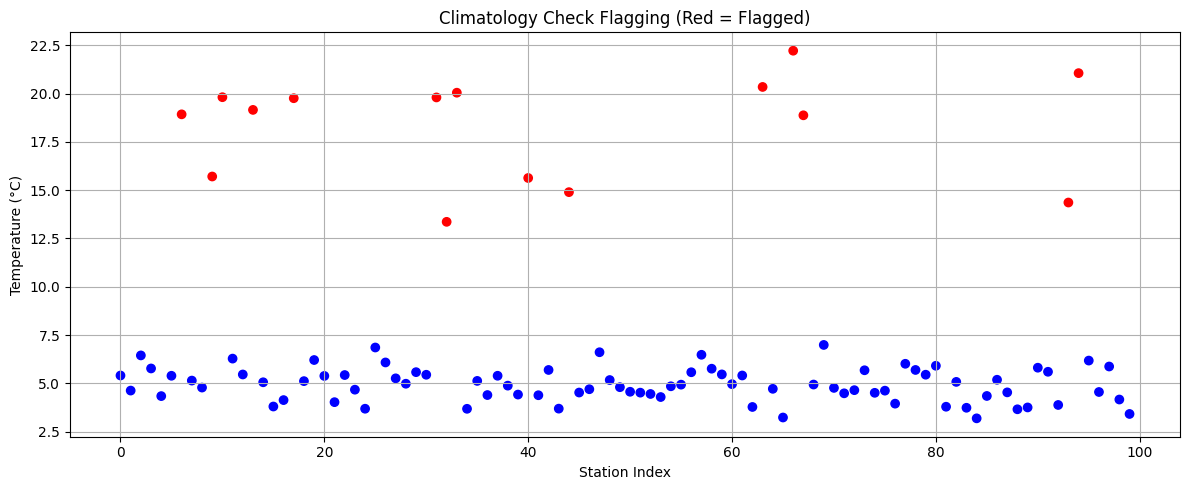

In [6]:
#Range check climatology
target_time = pd.to_datetime("2022-01-22T12:00:00")


unixtime = int(target_time.timestamp()) #need this as input for climatology 
tpos = np.full(n, 273.15+20)
tneg = np.full(n, 273.15-20)

flags = titanlib.range_check_climatology(points, temperature, unixtime, tpos, tneg)
print("Flags returned by Climatology Check:")
print(flags)

# Plot flagged results
plt.figure(figsize=(12, 5))
plt.scatter(range(n), temperature - 273.15, c=['red' if f else 'blue' for f in flags])
plt.title("Climatology Check Flagging (Red = Flagged)")
plt.xlabel("Station Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Buddy check

Flags returned by Buddy Check:
[0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


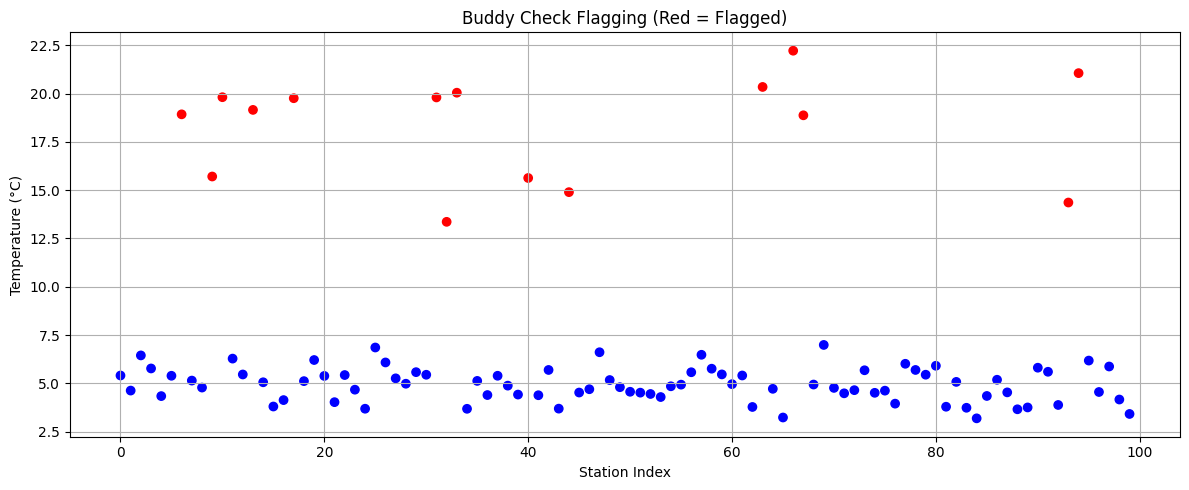

In [7]:
#Buddy check 

radius = np.full(points.size(), 5000)
num_min = np.full(points.size(), 1)
threshold = 2
max_elev_diff = 200
elev_gradient = -0.0065
min_std = 2
num_iterations = 5

flags = titanlib.buddy_check(
    points,
    temperature,
    radius,
    num_min,
    threshold,
    max_elev_diff,
    elev_gradient,
    min_std,
    num_iterations,
)
print("Flags returned by Buddy Check:")
print(flags)

# Plot flagged results
plt.figure(figsize=(12, 5))
plt.scatter(range(n), temperature - 273.15, c=['red' if f else 'blue' for f in flags])
plt.title("Buddy Check Flagging (Red = Flagged)")
plt.xlabel("Station Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Buddy event check  

Flags returned by Buddy Event Check:
[0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]


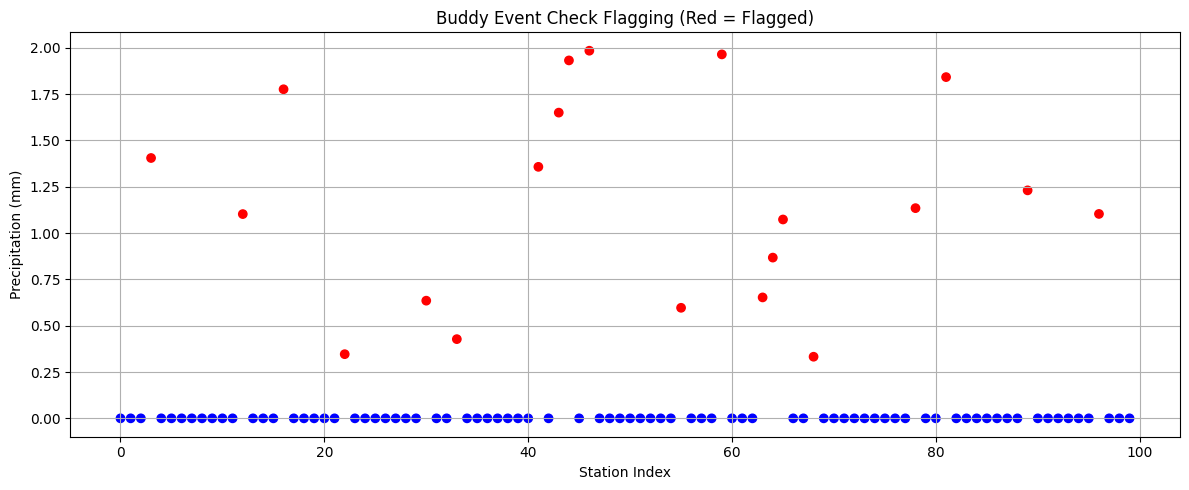

In [8]:
#Needs a yes/no event i.e. precip

import numpy as np
import titanlib

# Generate precipitation data (mostly zeros, some rain events)
precip_obs = np.zeros(n)
rain_indices = np.random.choice(n, size=20, replace=False)  # 20 random rain events
precip_obs[rain_indices] = np.random.uniform(0.3, 2.0, size=20)  # Rain amount between 0.3 and 2.0 mm

# Parameters for buddy_event_check
radius = np.full(n, 5000)       # 5 km radius
num_min = np.full(n, 1)         # Minimum 1 buddy observation required
event_threshold = 0.2                          # Threshold to define event presence (yes/no)
threshold = 0.25                              # Threshold to flag buddy observation event agreement
max_elev_diff = 10                            # Max elevation difference allowed [m]
elev_gradient = 0                             # Elevation gradient (set 0 if not used)
num_iterations = 5                            # Number of iterations for the check

# Run buddy event check to flag inconsistent points
flags = titanlib.buddy_event_check(points, precip_obs, radius, num_min,
                                   event_threshold, threshold,
                                   max_elev_diff, elev_gradient, num_iterations)

print("Flags returned by Buddy Event Check:")
print(flags)

# Plot flagged results
plt.figure(figsize=(12, 5))
plt.scatter(range(n), precip_obs, c=['red' if f else 'blue' for f in flags])
plt.title("Buddy Event Check Flagging (Red = Flagged)")
plt.xlabel("Station Index")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()


## First guess test

Flags returned by FGT:
[0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
FGT loop - Removing 16 observations. Number of tests 21
0.000361919 secs
FGT loop - Removing 0 observations. Number of tests 1
2.88486e-05 secs
Stopping early after 2 iterations
QC missing - Removing 0 observations. Number of tests 0
9.53674e-07 secs
Re-check bad obs - Removing 15 observations. Number of tests16
0.000157833 secs
>> Total Time 0.000603914secs


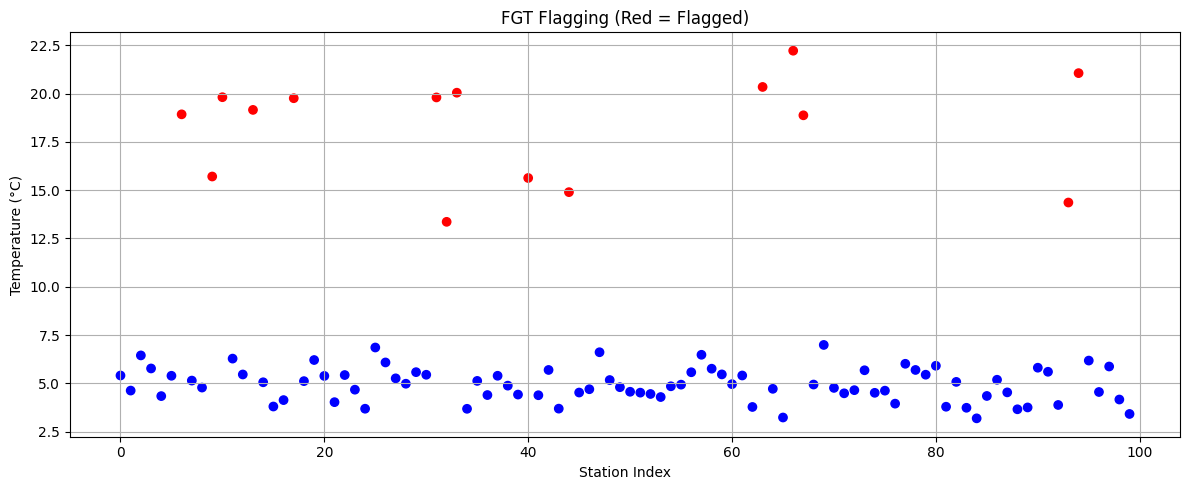

In [23]:
obs_to_check = np.ones(n)
background_values = np.zeros(n)
background_uncertainties = np.ones(n)
background_elab_type = titanlib.VerticalProfileTheilSen
num_min_outer = 3
num_max_outer = 10
inner_radius = 20000
outer_radius = 50000
num_iterations = 10
num_min_prof = 3
min_elev_diff = 100
min_horizontal_scale = 250
max_horizontal_scale = 100000
kth_closest_obs_horizontal_scale = 2
tpos = np.ones(n) * 4
tneg = np.ones(n) * 4
values_mina = temperature - 20
values_maxa = temperature + 20
values_minv = temperature - 2
values_maxv = temperature + 2
debug = False
basic = False


flags, scores = titanlib.fgt(points, temperature, obs_to_check,
    background_values, 
    background_uncertainties, 
    background_elab_type, 
    num_min_outer, 
    num_max_outer, 
    inner_radius, 
    outer_radius, 
    num_iterations, 
    num_min_prof, 
    min_elev_diff, 
    values_mina, 
    values_maxa, 
    values_minv, 
    values_maxv, 
    tpos, 
    tneg, 
    debug, 
    basic   
)

print("Flags returned by FGT:")
print(flags)

# Plot flagged results
plt.figure(figsize=(12, 5))
plt.scatter(range(n), temperature - 273.15, c=['red' if f else 'blue' for f in flags])
plt.title("FGT Flagging (Red = Flagged)")
plt.xlabel("Station Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Spatial consistency test 

Flags returned by SCT:
[0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


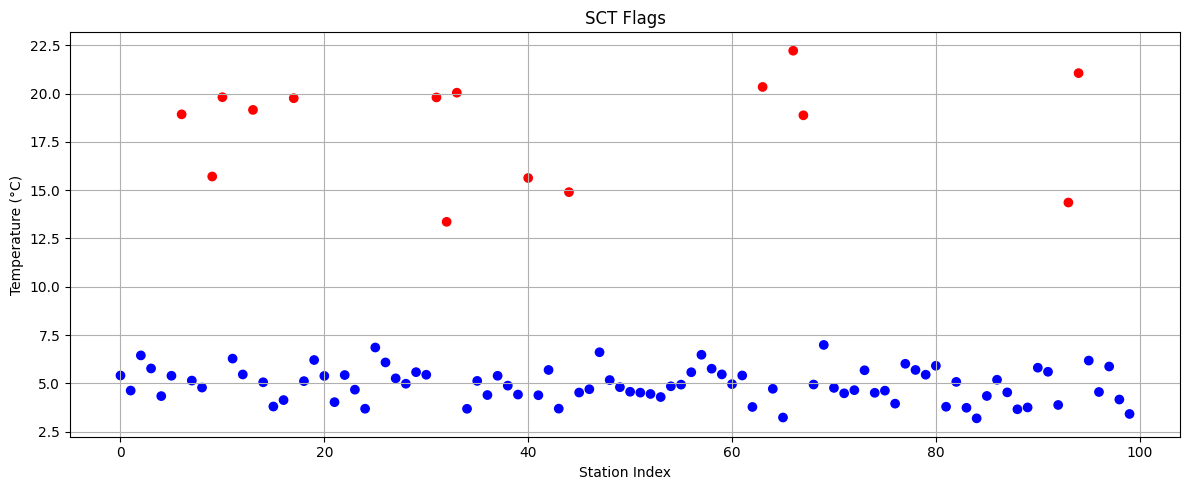

In [24]:
# SCT parameters
pos = np.full(n, 8)     # max positive deviation
neg = np.full(n, 8)     # max negative deviation
eps2 = np.full(n, 0.5)  # obs-error variance ratio

# Run SCT
flags, prob, rep = titanlib.sct(
    points,
    temperature,
    5,        # num_min
    100,      # num_max
    500,    # inner_radius
    150000,   # outer_radius
    5,        # num_iterations
    20,       # num_min_prof
    200,      # min_elev_diff
    10000,    # min_horizonal_scale
    200,      # vertical_scale
    pos,
    neg,
    eps2
)

print("Flags returned by SCT:")
print(flags)

# Plot flagged results
plt.figure(figsize=(12, 5))
plt.scatter(range(n), temperature - 273.15, c=['red' if f else 'blue' for f in flags])
plt.title("SCT Flags")
plt.xlabel("Station Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

## SCT Dataset
### <span style="color: red;">The Dataset object doesn't seem to work with SCT</span>

Flags returned by SCT using DataSet:
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


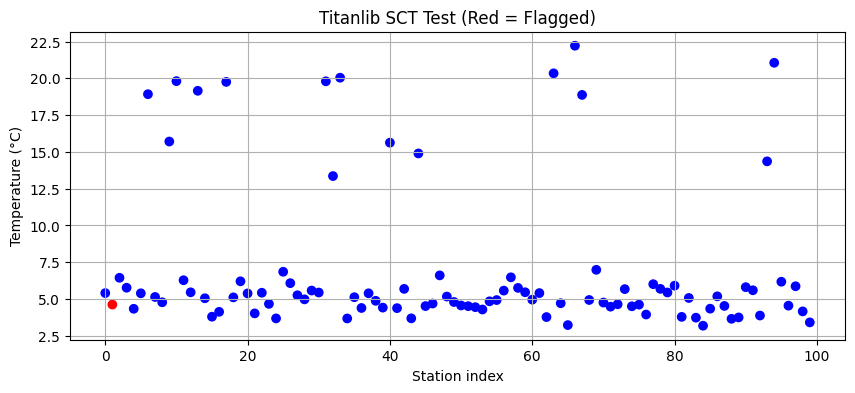

In [25]:
import numpy as np
import titanlib
import matplotlib.pyplot as plt



# Create the Dataset object
dataset = titanlib.Dataset(points, temperature)


# Add a range check before SCT
tneg = np.full(n, 233.15)  # -40 °C
tpos = np.full(n, 313.15)  # +40 °C
dataset.range_check(tneg, tpos)

# Parameters for SCT
num_min = 2
num_max = 10
inner_radius = 500  # meters
num_iterations = 5
num_min_prof = 2
min_elev_diff = 50
vertical_scale = 500  # meters
outer_radius = 150000
min_horizonal_scale = 5000
eps2 = np.full(n, 0.1)
pos = np.full(n, 0.75)
neg = np.full(n, 0.75)

# Ratio of obs error variance to background variance
eps2 = np.full(n, 0.5)

# All observations will be checked (1 = check, 0 = skip)
obs_to_check = np.ones(n, dtype=int)


# Run SCT
dataset.sct(num_min,
            num_max,
            inner_radius,
            outer_radius,
            num_iterations,
            num_min_prof,
            min_elev_diff,
            min_horizonal_scale,
            vertical_scale,
            pos,
            neg,
            eps2,
            obs_to_check)

# Extract flags
flags = dataset.get_flags()

print("Flags returned by SCT using DataSet:")
print(flags)

# Plot results
plt.figure(figsize=(10, 4))
plt.scatter(range(n), temperature - 273.15, c=['red' if f else 'blue' for f in flags])
plt.xlabel("Station index")
plt.ylabel("Temperature (°C)")
plt.title("Titanlib SCT Test (Red = Flagged)")
plt.grid(True)
plt.show()

## Spatial consistency test resistant 

Flags returned by SCT-Resistant:
[0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


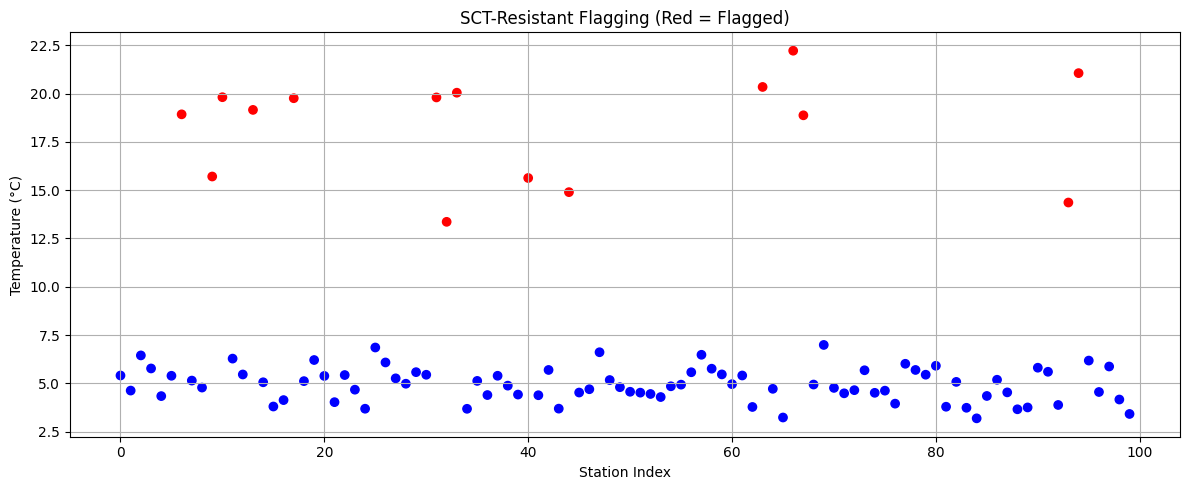

In [26]:
# SCT-resistant parameters
obs_to_check = np.ones(n, dtype=int)
background_values = np.zeros(n)
background_elab_type = titanlib.VerticalProfileTheilSen

num_min_outer = 5
num_max_outer = 100
inner_radius = 50000      # meters
outer_radius = 150000     # meters
num_iterations = 5
num_min_prof = 20
min_elev_diff = 200
min_horizontal_scale = 10000
max_horizontal_scale = 150000
kth_closest_obs_horizontal_scale = 2
vertical_scale = 200

# Limits on values (reasonable bounds for temperature)
values_mina = temperature - 5.0
values_maxa = temperature + 5.0
values_minv = temperature - 1.0
values_maxv = temperature + 1.0

# SCT error variances and thresholds
eps2 = np.full(n, 0.5)
tpos = np.full(n, 4.0)  # max positive deviation (K)
tneg = np.full(n, 8.0)  # max negative deviation (K)

debug = False
basic = True

# Run SCT-resistant
flags, prob = titanlib.sct_resistant(
    points,
    temperature,
    obs_to_check,
    background_values,
    background_elab_type,
    num_min_outer,
    num_max_outer,
    inner_radius,
    outer_radius,
    num_iterations,
    num_min_prof,
    min_elev_diff,
    min_horizontal_scale,
    max_horizontal_scale,
    kth_closest_obs_horizontal_scale,
    vertical_scale,
    values_mina,
    values_maxa,
    values_minv,
    values_maxv,
    eps2,
    tpos,
    tneg,
    debug,
    basic
)

print("Flags returned by SCT-Resistant:")
print(flags)


# Plot flagged results
plt.figure(figsize=(12, 5))
plt.scatter(range(n), temperature - 273.15, c=['red' if f else 'blue' for f in flags])
plt.title("SCT-Resistant Flagging (Red = Flagged)")
plt.xlabel("Station Index")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

